<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Credit_Card_Transactions_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
training_df = pd.read_csv('fraudTrain.csv')
testing_df = pd.read_csv('fraudTest.csv')

In [5]:
#Before we merge, lets see if the columns are same:
if training_df.columns.equals(testing_df.columns):
    print("Column names are the same.")
else:
    print("Column names are different.")

Column names are the same.


In [6]:
# Merging training and testing dataset
merged_df = pd.concat([training_df, testing_df], ignore_index=True)

In [7]:
#Shuffling the datasets
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [8]:
merged_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,68759,2019-02-10 16:06:15,3512365128314616,fraud_Beier and Sons,home,23.50,Francisco,Kemp,M,9554 Flores Drive,...,38.4305,-90.3870,35439,Land/geomatics surveyor,1985-03-31,6854c446770fdecdd31f43f95a6cd9d2,1328889975,37.767198,-89.413657,0
1,370489,2019-06-20 21:09:42,502038091380,fraud_Lubowitz-Walter,kids_pets,48.04,Kurt,Peters,M,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,bd1aa527dc4b72cfad9790ced6fd2f41,1340226582,36.603988,-93.415623,0
2,797978,2019-12-03 15:40:08,30234966027947,fraud_Hudson-Grady,shopping_pos,2.94,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,...,43.9446,-88.0911,5196,Child psychotherapist,1978-01-22,02fb32e35ddf68ba7d97f4208f6fa35d,1354549208,43.322186,-88.739356,0
3,92439,2019-02-24 13:50:51,6011438889172900,fraud_Ernser-Lynch,food_dining,64.10,Allison,Allen,F,40624 Rebecca Spurs,...,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,bdb88a95280647bf2aa73a32f7e11f95,1330091451,35.064019,-90.373794,0
4,482080,2020-12-15 11:31:24,30030380240193,"fraud_Langworth, Boehm and Gulgowski",shopping_net,80.95,William,Jenkins,M,50614 Kevin Point,...,30.2816,-99.2410,2395,"Pharmacist, community",1993-11-17,9273f9e2706c6578a6bd7a2875ee8210,1387107084,29.607620,-98.852008,0


In [9]:
import numpy as np
# check nan values in the is_fraud column
merged_df[merged_df['is_fraud'].isna()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [10]:
merged_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Remove the rows with nan values
clean_df = merged_df.dropna()

In [12]:
# check for nan values
clean_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
# Remove column Unnamed: 0
clean_df = clean_df.drop(['Unnamed: 0'],axis=1)

In [14]:
# Show all columns
pd.set_option('display.max_columns',None)

In [15]:
clean_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-02-10 16:06:15,3512365128314616,fraud_Beier and Sons,home,23.50,Francisco,Kemp,M,9554 Flores Drive,Arnold,MO,63010,38.4305,-90.3870,35439,Land/geomatics surveyor,1985-03-31,6854c446770fdecdd31f43f95a6cd9d2,1328889975,37.767198,-89.413657,0
1,2019-06-20 21:09:42,502038091380,fraud_Lubowitz-Walter,kids_pets,48.04,Kurt,Peters,M,7290 Ashlee Keys,Kissee Mills,MO,65680,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,bd1aa527dc4b72cfad9790ced6fd2f41,1340226582,36.603988,-93.415623,0
2,2019-12-03 15:40:08,30234966027947,fraud_Hudson-Grady,shopping_pos,2.94,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,New Holstein,WI,53061,43.9446,-88.0911,5196,Child psychotherapist,1978-01-22,02fb32e35ddf68ba7d97f4208f6fa35d,1354549208,43.322186,-88.739356,0
3,2019-02-24 13:50:51,6011438889172900,fraud_Ernser-Lynch,food_dining,64.10,Allison,Allen,F,40624 Rebecca Spurs,De Witt,AR,72042,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,bdb88a95280647bf2aa73a32f7e11f95,1330091451,35.064019,-90.373794,0
4,2020-12-15 11:31:24,30030380240193,"fraud_Langworth, Boehm and Gulgowski",shopping_net,80.95,William,Jenkins,M,50614 Kevin Point,Harper,TX,78631,30.2816,-99.2410,2395,"Pharmacist, community",1993-11-17,9273f9e2706c6578a6bd7a2875ee8210,1387107084,29.607620,-98.852008,0


In [16]:
clean_df.shape
print(f"Data has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns.")

Data has 1852394 rows and 22 columns.


In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [18]:
category_df = clean_df['category'].value_counts()
category_df

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

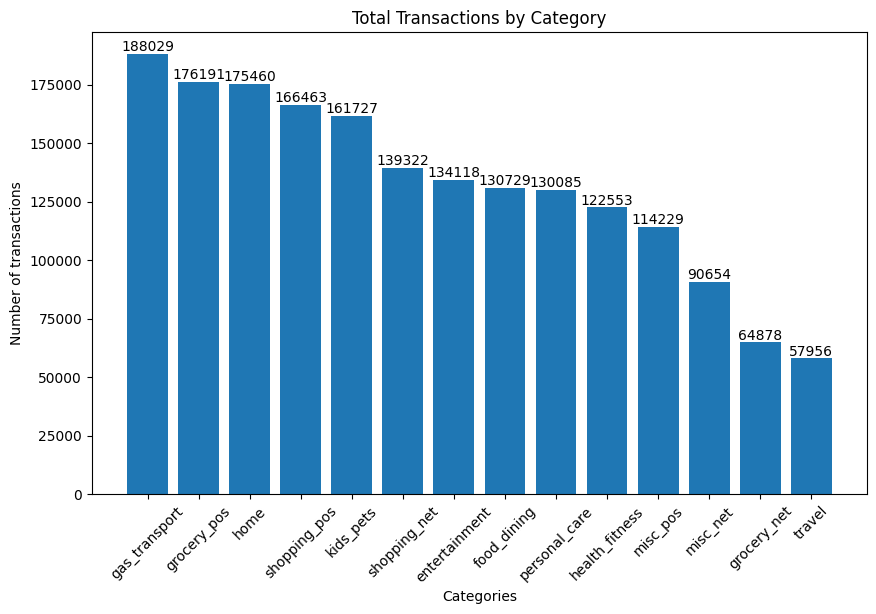

In [19]:
import matplotlib.pyplot as plt

def add_labls(x,y):
  for k in range(len(x)):
    plt.text(k,y[k],y[k],ha='center',va='bottom')

plt.figure(figsize=(10,6))

plt.bar(category_df.index,category_df.values)
add_labls(category_df.index,category_df.values)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Number of transactions')
plt.title('Total Transactions by Category')

plt.show()

In [20]:
state_df = clean_df['state'].value_counts()

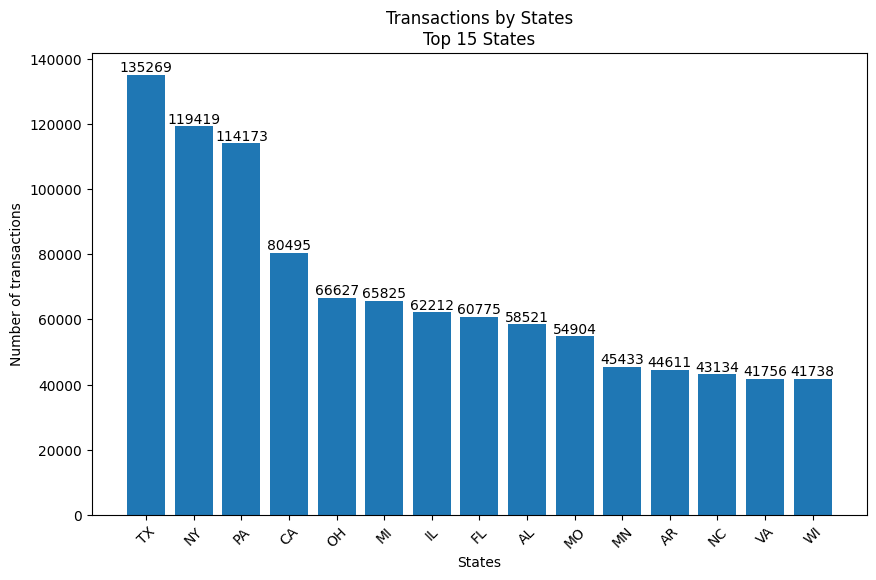

In [21]:
plt.figure(figsize=(10,6))

plt.bar(state_df[:15].index,state_df[:15].values)
add_labls(state_df[:15].index,state_df[:15].values)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Number of transactions')
plt.title('Transactions by States\nTop 15 States')

plt.show()

In [22]:
# Convert trans_date_trans_time to datetime
clean_df['trans_date_trans_time'] = pd.to_datetime(clean_df['trans_date_trans_time'])

In [23]:
# Aggregate by month
clean_df['month'] = clean_df['trans_date_trans_time'].dt.to_period('M')
transactions_by_month = clean_df.groupby('month').size()

In [24]:
transactions_by_month.index.unique()

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='month')

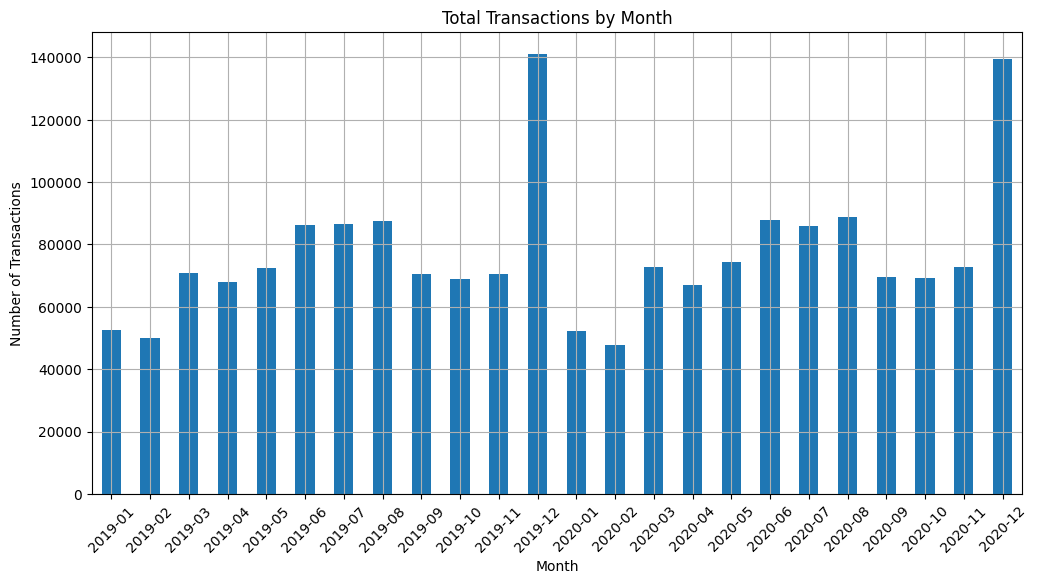

In [25]:
# Plotting transactions by date
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.title('Total Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
customer_job_df = clean_df['job'].value_counts()
customer_job_df[:10]

job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
Designer, ceramics/pottery    11688
Environmental consultant      10974
Financial adviser             10963
Systems developer             10962
IT trainer                    10943
Name: count, dtype: int64

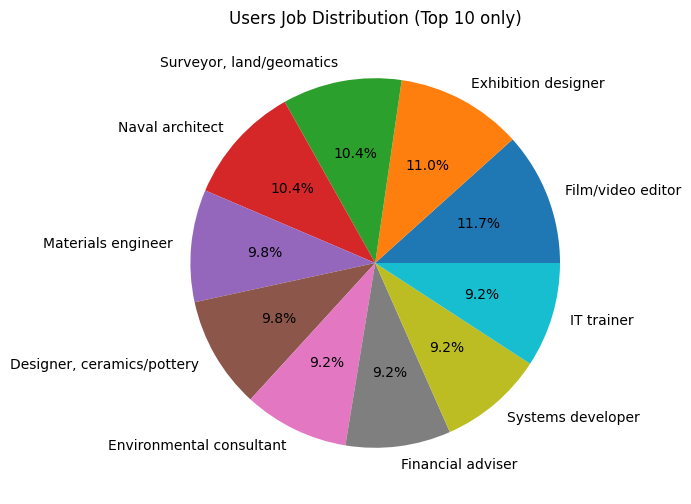

In [27]:
# Pie Chart of Users Job Distribution (Top 10 only)
plt.figure(figsize=(8, 6))
customer_job_df[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Users Job Distribution (Top 10 only)')
plt.ylabel('')
plt.show()

In [28]:
# merchant
merchant_df = clean_df['merchant'].value_counts()
print(f"Total {len(merchant_df)} merchants were flagged for fraudulent activities.")

Total 693 merchants were flagged for fraudulent activities.


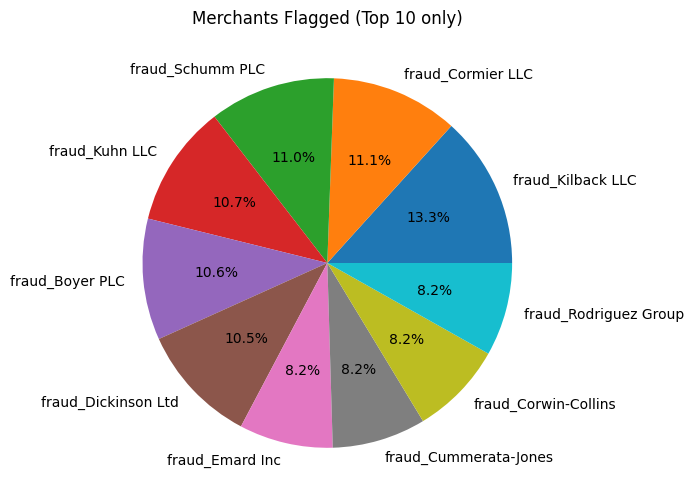

In [29]:
# Pie Chart of Users Job Distribution (Top 10 only)
plt.figure(figsize=(8, 6))
merchant_df[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Merchants Flagged (Top 10 only)')
plt.ylabel('')
plt.show()

In [30]:
# Transactions by Age Group
from datetime import datetime
# Convert dob to datetime
clean_df['dob'] = pd.to_datetime(clean_df['dob'])

# Calculate age
current_year = datetime.now().year
clean_df['age'] = current_year - clean_df['dob'].dt.year

In [31]:
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+']
clean_df['age_group'] = pd.cut(clean_df['age'], bins=bins, labels=labels, right=False)

In [32]:
# Count transactions per age group
transactions_by_age_group = clean_df['age_group'].value_counts().sort_index()

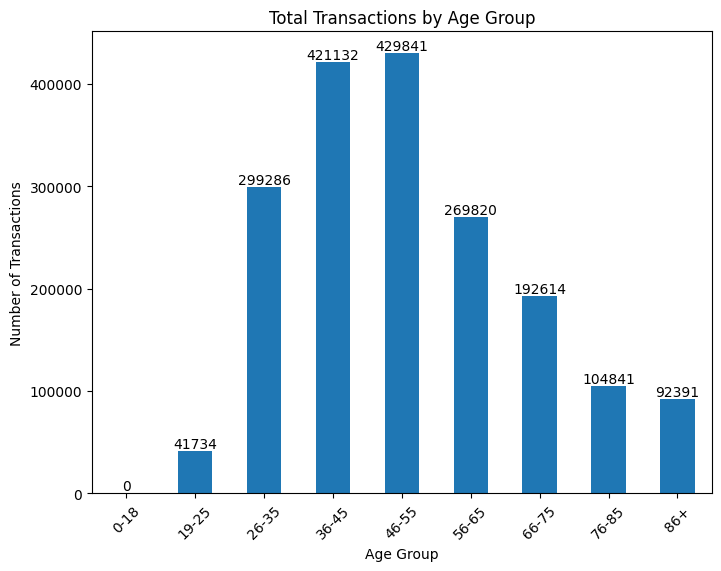

In [33]:
# Plotting Transactions by Age Group
plt.figure(figsize=(8, 6))
transactions_by_age_group.plot(kind='bar')
add_labls(transactions_by_age_group.index,transactions_by_age_group.values)
plt.title('Total Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Derive additional features from 'trans_date_trans_time'

clean_df['hour'] = clean_df['trans_date_trans_time'].dt.hour
clean_df['day'] = clean_df['trans_date_trans_time'].dt.day
clean_df['weekday'] = clean_df['trans_date_trans_time'].dt.weekday
clean_df['month'] = clean_df['trans_date_trans_time'].dt.month

In [35]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [36]:
clean_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,month,age,age_group,hour,day,weekday
0,2019-02-10 16:06:15,3512365128314616,fraud_Beier and Sons,home,23.50,Francisco,Kemp,M,9554 Flores Drive,Arnold,MO,63010,38.4305,-90.3870,35439,Land/geomatics surveyor,1985-03-31,6854c446770fdecdd31f43f95a6cd9d2,1328889975,37.767198,-89.413657,0,2,39,36-45,16,10,6
1,2019-06-20 21:09:42,502038091380,fraud_Lubowitz-Walter,kids_pets,48.04,Kurt,Peters,M,7290 Ashlee Keys,Kissee Mills,MO,65680,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,bd1aa527dc4b72cfad9790ced6fd2f41,1340226582,36.603988,-93.415623,0,6,44,36-45,21,20,3
2,2019-12-03 15:40:08,30234966027947,fraud_Hudson-Grady,shopping_pos,2.94,Matthew,Lambert,M,7188 Melissa Crest Apt. 151,New Holstein,WI,53061,43.9446,-88.0911,5196,Child psychotherapist,1978-01-22,02fb32e35ddf68ba7d97f4208f6fa35d,1354549208,43.322186,-88.739356,0,12,46,46-55,15,3,1
3,2019-02-24 13:50:51,6011438889172900,fraud_Ernser-Lynch,food_dining,64.10,Allison,Allen,F,40624 Rebecca Spurs,De Witt,AR,72042,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,bdb88a95280647bf2aa73a32f7e11f95,1330091451,35.064019,-90.373794,0,2,31,26-35,13,24,6
4,2020-12-15 11:31:24,30030380240193,"fraud_Langworth, Boehm and Gulgowski",shopping_net,80.95,William,Jenkins,M,50614 Kevin Point,Harper,TX,78631,30.2816,-99.2410,2395,"Pharmacist, community",1993-11-17,9273f9e2706c6578a6bd7a2875ee8210,1387107084,29.607620,-98.852008,0,12,31,26-35,11,15,1


In [37]:
# Group the data by 'cc_num' and 'is_fraud',
# then count the number of transactions for each group

mul_trans = clean_df.groupby(['cc_num', 'is_fraud'],as_index=False).size()
fraud_cc_trans = mul_trans[mul_trans['is_fraud']==1]

# Top 10 credit card number that there flagged with fraud transactions
fraud_cc_trans.sort_values('size',ascending=False).head(n=10)

,cc_num,is_fraud,size
230,4593569795412,1,19
1396,4599285557366057,1,19
937,3520550088202337,1,19
1674,6538441737335434,1,18
187,4260128500325,1,18
1183,3589289942931264,1,16
1404,4629451965224809,1,16
774,2227671554547514,1,16
1781,4400011257587661852,1,16
1479,4874006077381178,1,16


In [38]:
# count the occurrences of transactions each hour
trans_per_hour = clean_df['hour'].value_counts()
trans_per_hour

hour
23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: count, dtype: int64

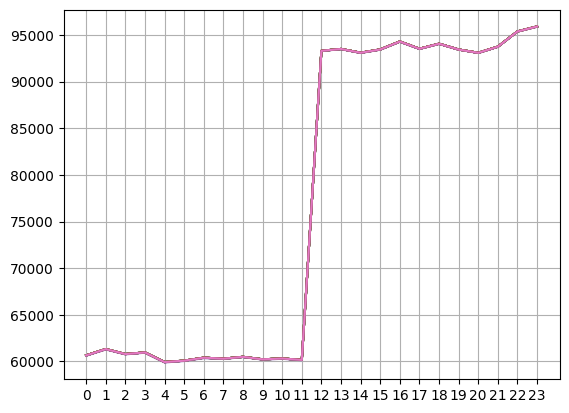

In [39]:
#get all the unique value of hour
hours = [hour for hour, df in clean_df.groupby('hour')]

plt.plot(hours, clean_df.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

In [40]:
# Filter the DataFrame for fraudulent transactions and count the occurrences of each hour
fraud_trans = clean_df[clean_df['is_fraud']==1]['hour'].value_counts()
fraud_trans = fraud_trans.sort_index()
fraud_trans

hour
0      823
1      827
2      793
3      803
4       61
5       80
6       54
7       72
8       59
9       61
10      52
11      59
12      84
13      94
14     100
15     100
16      97
17      94
18     111
19     105
20      98
21     101
22    2481
23    2442
Name: count, dtype: int64

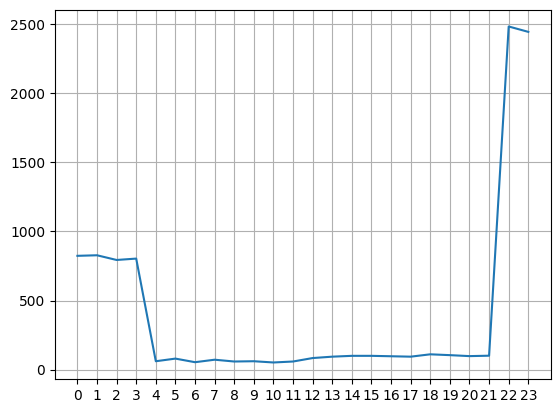

In [41]:
plt.plot(fraud_trans.index, fraud_trans.values)
plt.xticks(fraud_trans.index)
plt.grid()
plt.show()

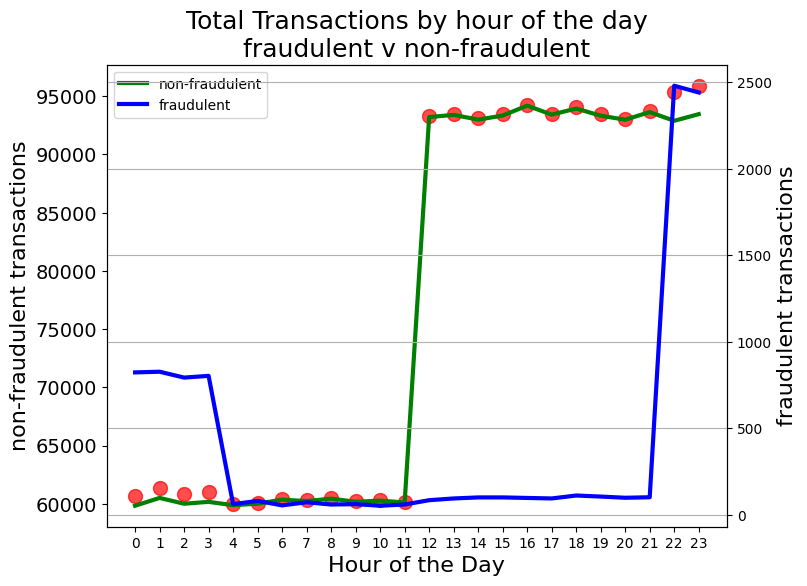

In [42]:
# total transactions by hour
total_trans = clean_df['hour'].value_counts().sort_index()

# total non-fraudulent transactions by hour
non_fraud_trans = clean_df[clean_df['is_fraud'] == 0]['hour'].value_counts().sort_index()

# total fraudulent transactions by hour
fraud_trans = clean_df[clean_df['is_fraud'] == 1]['hour'].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.title('Total Transactions by hour of the day\nfraudulent v non-fraudulent', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fraud_trans.index)

ax1=plt.gca()
ax2 = ax1.twinx() #create second y-axis

# plot the total transactions
ax1.scatter(x=total_trans.index, y=total_trans.values,c='red',alpha=0.7,s=100)

# Plot non-fraudulent transactions
line1, = ax1.plot(non_fraud_trans.index,non_fraud_trans.values, c='green', linewidth=3,label='non-fraudulent')
ax1.set_xlabel('Hour of the Day',fontsize=16)
ax1.set_ylabel('non-fraudulent transactions',fontsize=16)

# Plot fraudulent transactions
line2, = ax2.plot(fraud_trans.index, fraud_trans.values, c='blue', linewidth=3,label='fraudulent')
ax2.set_ylabel('fraudulent transactions',fontsize=16)

# Combine the legends from both axes
ax1.legend(handles=[line1, line2], loc='upper left')

plt.grid()
plt.show()

In [43]:
# total transactions: fraudulent and non-fraudulent
fraud_data = clean_df['is_fraud'].value_counts()
fraud_data

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

##The dataset is unbalanced as the distribution of fraudulent and non-fraudulent is not balanced.

###Only taking the subset of data for the experimentation.

In [48]:
non_fraud_df = clean_df[clean_df['is_fraud']==0].iloc[:19302, :]
fraud_df = clean_df[clean_df['is_fraud']==1]

new_df = pd.concat([non_fraud_df,fraud_df],axis=0)
new_df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,month,age,age_group,hour,day,weekday
1851496,2020-02-19 03:45:59,3533177016567295,fraud_Bartoletti-Wunsch,gas_transport,18.86,Derek,Bentley,M,782 Lee Crossing Apt. 209,Weeping Water,NE,68463,40.8731,-96.1528,1517,Dealer,1951-11-08,27f13177d452dd58d629d3b12cefb5f1,1361245559,40.663682,-96.654637,1,2,73,66-75,3,19,2
1851582,2019-06-29 01:58:25,4308156300921054,fraud_Strosin-Cruickshank,grocery_pos,310.54,William,Marshall,M,454 Sawyer Forks Apt. 231,Collegeville,MN,56321,45.5783,-94.4199,1536,Farm manager,1981-02-18,5e094b2927c0f6f4a235ca1eb7a67563,1340935105,46.293289,-93.463155,1,6,43,36-45,1,29,5
1851669,2020-06-06 22:49:55,4440581794652,"fraud_Daugherty, Pouros and Beahan",shopping_pos,997.11,Karen,Cooper,F,425 Caleb Point Apt. 050,San Diego,CA,92128,33.0067,-117.0690,1241364,"Pharmacist, hospital",1960-03-01,7643c541b185615375b941e7a2d662d6,1370558995,32.959991,-117.107205,1,6,64,56-65,22,6,5
1852143,2019-06-09 23:50:27,639023984367,"fraud_O'Connell, Botsford and Hand",home,301.59,Destiny,Lowe,F,79472 Stevens Trace Apt. 120,Hannawa Falls,NY,13647,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,6706712a58e43b23f69f26b701f6546e,1339285827,44.931502,-74.583154,1,6,33,26-35,23,9,6
1852180,2019-10-21 02:05:50,4025612008285111,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,300.95,Krystal,Key,F,23142 Montoya Island Apt. 742,Corsica,PA,15829,41.1762,-79.1976,1274,Maintenance engineer,1949-03-20,10d577afe5c42997482be3c94b5b9b71,1350785150,41.575237,-78.522152,1,10,75,76-85,2,21,0


In [49]:
# shuffle the data
df = new_df.sample(frac=1).reset_index(drop=True)


In [68]:
# 'hour', 'day', 'weekday', 'month', 'amt', 'merchant', 'category', 'merch_lat', 'merch_long', 'city_pop', 'job', 'gender', 'age'
# unwanted observations: Unanmed: 0, first, last, street, lat, long, trans_date_trans_time, cc_num, trans_num,

In [50]:
# Select relevant features to be used for training and testing
features = ['hour', 'day', 'weekday', 'month', 'amt', 'merchant', 'category', 'merch_lat', 'merch_long', 'city_pop', 'job', 'gender', 'age']

X = df[features]
y = df['is_fraud']

In [51]:
print(X.shape)
print(y.shape)

(28953, 13)
(28953,)


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28953 entries, 0 to 28952
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        28953 non-null  int32  
 1   day         28953 non-null  int32  
 2   weekday     28953 non-null  int32  
 3   month       28953 non-null  int32  
 4   amt         28953 non-null  float64
 5   merchant    28953 non-null  object 
 6   category    28953 non-null  object 
 7   merch_lat   28953 non-null  float64
 8   merch_long  28953 non-null  float64
 9   city_pop    28953 non-null  int64  
 10  job         28953 non-null  object 
 11  gender      28953 non-null  object 
 12  age         28953 non-null  int64  
dtypes: float64(3), int32(4), int64(2), object(4)
memory usage: 2.4+ MB


In [53]:
# check for categorical features
categorical_x = X.select_dtypes(include=['object'])

In [55]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

# One hot encoding for categorical features
# Create instance of OneHotEncoder
ENCODER = OneHotEncoder(sparse_output=True)
ENCODER.fit(categorical_x)

encoded_features = ENCODER.transform(categorical_x).toarray()



In [56]:
# check for categorical features
numerical_x = X.select_dtypes(include=['number'])


In [57]:
from sklearn.preprocessing import StandardScaler

# bringing the numerical datas to normal range
scaler = StandardScaler()
scaler.fit(numerical_x)

numerical_features = scaler.transform(numerical_x)

In [59]:
# Concatenate both numerical features and encoded categorical features
features_data = np.concatenate([numerical_features,encoded_features],axis=1)

###Split the data into training and testing

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_data,y,test_size=.2,stratify=y)

In [63]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score

In [74]:
knn = KNeighborsClassifier()

# Model TRAINING
knn.fit(X_train,y_train)

# Model PREDICTION
pred_labels_knn = knn.predict(X_test)

print(pred_labels_knn[1])
print(y_test.iloc[1])

# Accuracy of the model
accuracy_knn = accuracy_score(y_test,pred_labels_knn)
accuracy_knn = round(accuracy_knn * 100,2)
print(f"The accuracy of the KNN Model is {accuracy_knn}%")

# confusion matrix
#knn_cm = confusion_matrix(y_test,pred_labels_knn)
knn_cm = confusion_matrix(y_test,pred_labels_knn)
print(knn_cm)

# precision_score
knn_ps = precision_score(y_test,pred_labels_knn,average='micro')
print(knn_ps)

# recall score
knn_rs = recall_score(y_test,pred_labels_knn,average='micro')
print(knn_rs)

# f1 score
knn_fs = f1_score(y_test,pred_labels_knn,average='micro')
print(knn_fs)

0
0
The accuracy of the KNN Model is 91.37%
[[3636  225]
 [ 275 1655]]
0.9136591262303575
0.9136591262303575
0.9136591262303575


In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

pred_labels_dec_tree = dec_tree.predict(X_test)

# Accuracy of the model
accuracy_tree = accuracy_score(y_test,pred_labels_dec_tree)
accuracy_tree = round(accuracy_tree * 100,2)
print(f"The accuracy of the Decision Tree is {accuracy_tree}%")

# confusion matrix
tree_cm = confusion_matrix(y_test,pred_labels_dec_tree)
print(tree_cm)

# precision_score
tree_ps = precision_score(y_test,pred_labels_dec_tree, pos_label=1,average='weighted')
print(tree_ps)

# recall score
tree_rs = recall_score(y_test,pred_labels_dec_tree, pos_label=1,average='weighted')
print(tree_rs)

# f1 score
tree_fs = f1_score(y_test,pred_labels_dec_tree, pos_label=1,average='weighted')
print(tree_fs)

The accuracy of the Decision Tree is 97.44%
[[3780   81]
 [  67 1863]]
0.9745017280219535
0.9744431013641858
0.9744660711516445


In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,y_train)

pred_lbls_rf = random.predict(X_test)
pred_lbls_rf.shape

# Accuracy of the model
accuracy_ran_forest= accuracy_score(y_test,pred_lbls_rf)
accuracy_ran_forest = round(accuracy_ran_forest * 100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_ran_forest}%")

# confusion matrix
ran_forest_cm = confusion_matrix(y_test,pred_lbls_rf)
print(ran_forest_cm)

# precision_score
ran_forest_ps = precision_score(y_test,pred_lbls_rf,average='micro')
print(ran_forest_ps)

# recall score
ran_forest_rs = recall_score(y_test,pred_lbls_rf,average='micro')
print(ran_forest_rs)

# f1 score
ran_forest_fs = f1_score(y_test,pred_lbls_rf,average='micro')
print(ran_forest_fs)

The accuracy of the Random Forest Model is 97.13%
[[3827   34]
 [ 132 1798]]
0.9713348299084786
0.9713348299084786
0.9713348299084786


In [75]:
# XGBoost
from xgboost import XGBClassifier


# Instantiation
model_xg = XGBClassifier()

# Training the model
model_xg.fit(X_train, y_train)

# Predict the model
pred_lbls_xg = model_xg.predict(X_test)
# print(pred_lbls_xg)

# Accuracy of the model
accuracy_xg= accuracy_score(y_test,pred_lbls_xg)
accuracy_xg = round(accuracy_xg * 100,2)
print(f"The accuracy of the XGBoost Model is {accuracy_xg}%")

# Confusion Matrix
xg_cm = confusion_matrix(y_test,pred_lbls_xg)
print('confusion_matrix:')
print(xg_cm)

# precision_score
xg_ps = precision_score(y_test,pred_lbls_xg,average='micro')
print('precision_score:',xg_ps)

# recall score
xg_rs = recall_score(y_test,pred_lbls_xg,average='micro')
print('recall score:',xg_rs)

# f1 score
xg_fs = f1_score(y_test,pred_lbls_xg,average='micro')
print('f1 score:',xg_fs)

The accuracy of the XGBoost Model is 98.38%
confusion_matrix:
[[3817   44]
 [  50 1880]]
precision_score: 0.9837679157313072
recall score: 0.9837679157313072
f1 score: 0.9837679157313072


In [77]:
# SVM
from sklearn.svm import SVC

# Instantiation
svm = SVC()

# Model Training
svm.fit(X_train, y_train)

# Model Prediction
pred_labels_svm = svm.predict(X_test)

# Accuracy of the model
accuracy_svm = accuracy_score(y_test, pred_labels_svm)
accuracy_svm = round(accuracy_svm * 100, 2)
print(f"The accuracy of the SVM Model is {accuracy_svm}%")

# confusion matrix
svm_cm = confusion_matrix(y_test, pred_labels_svm)
print("confusion matrix:")
print(svm_cm, '\n')

# precision_score
svm_ps = precision_score(y_test, pred_labels_svm, average='weighted')
print(f"The precision_score of the SVM Model is {round(svm_ps, 4)}")

# recall score
svm_rs = recall_score(y_test, pred_labels_svm, average='weighted')
print(f"The recall score of the SVM Model is {round(svm_rs, 4)}")

# f1 score
svm_fs = f1_score(y_test, pred_labels_svm, average='weighted')
print(f"The f1 score of the SVM Model is {round(svm_fs, 4)}")

The accuracy of the SVM Model is 92.47%
confusion matrix:
[[3802   59]
 [ 377 1553]] 

The precision_score of the SVM Model is 0.9277
The recall score of the SVM Model is 0.9247
The f1 score of the SVM Model is 0.9228


In [76]:
# Using Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

In [79]:
# Implementing Neural Network with LeakyRelu Activation
# Feed Forward Network
model = Sequential()

# Input Layer
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(LeakyReLU())
model.add(BatchNormalization())

# Hidden Layer
model.add(Dense(128))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(LeakyReLU())
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [82]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model.fit(X_train,y_train,epochs=100,batch_size=20)

Epoch 1/100
1159/1159 [==============================] - 26s 9ms/step - loss: 700.2413 - accuracy: 0.9356
Epoch 2/100
1159/1159 [==============================] - 9s 8ms/step - loss: 583.3326 - accuracy: 0.9330
Epoch 3/100
1159/1159 [==============================] - 12s 10ms/step - loss: 443.5933 - accuracy: 0.9354
Epoch 4/100
1159/1159 [==============================] - 8s 7ms/step - loss: 425.9770 - accuracy: 0.9366
Epoch 5/100
1159/1159 [==============================] - 12s 10ms/step - loss: 415.6121 - accuracy: 0.9330
Epoch 6/100
1159/1159 [==============================] - 8s 7ms/step - loss: 365.9184 - accuracy: 0.9440
Epoch 7/100
1159/1159 [==============================] - 12s 10ms/step - loss: 338.6898 - accuracy: 0.9430
Epoch 8/100
1159/1159 [==============================] - 8s 7ms/step - loss: 299.6154 - accuracy: 0.9458
Epoch 9/100
1159/1159 [==============================] - 12s 10ms/step - loss: 347.8990 - accuracy: 0.9383
Epoch 10/100
1159/1159 [======================

In [83]:
# Evaluate the Model
_,accuracy = model.evaluate(X_test,y_test)
accuracy = round(accuracy*100,2)
print(f'Accuracy: {accuracy}%')

181/181 [==============================] - 2s 7ms/step - loss: 258.6643 - accuracy: 0.9513
Accuracy: 95.13%


In [101]:
pred_lbels = model.predict(X_test)
print(pred_lbels)

181/181 [==============================] - 1s 6ms/step
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [99]:
print(y_test)

[1 0 1 ... 0 0 1]


In [108]:
# Convert 2D array of probabilities to 1D array of class labels
pred_labels = (pred_lbels.flatten() >= 0.5).astype(int)

# Confusion Matrix
nn_cm = confusion_matrix(y_test, pred_labels)
print('confusion_matrix:')
print(nn_cm)

# precision_score
nn_ps = precision_score(y_test, pred_labels,average='weighted')
print('precision_score:',nn_ps)

# recall score
nn_rs = recall_score(y_test, pred_labels,average='weighted')
print('recall score:',nn_rs)

# f1 score
nn_fs = f1_score(y_test, pred_labels,average='weighted')
print('f1 score:',nn_fs)

confusion_matrix:
[[3718  143]
 [ 139 1791]]
precision_score: 0.9513299268857821
recall score: 0.9513037471939216
f1 score: 0.9513163334150431


In [109]:
# Implementing Neural Network with Relu Activation

# Feed Forward Network
model = Sequential()

# Input Layer
model.add(Dense(512,input_shape=(X_train.shape[1],),activation='relu'))

# Hidden Layer
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))


# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [110]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
724/724 [==============================] - 15s 15ms/step - loss: 0.2627 - accuracy: 0.8958
Epoch 2/50
724/724 [==============================] - 11s 15ms/step - loss: 0.1584 - accuracy: 0.9319
Epoch 3/50
724/724 [==============================] - 9s 12ms/step - loss: 0.0996 - accuracy: 0.9589
Epoch 4/50
724/724 [==============================] - 11s 15ms/step - loss: 0.0569 - accuracy: 0.9780
Epoch 5/50
724/724 [==============================] - 13s 18ms/step - loss: 0.0311 - accuracy: 0.9887
Epoch 6/50
724/724 [==============================] - 14s 20ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 7/50
724/724 [==============================] - 18s 25ms/step - loss: 0.0128 - accuracy: 0.9952
Epoch 8/50
724/724 [==============================] - 19s 27ms/step - loss: 0.0112 - accuracy: 0.9961
Epoch 9/50
724/724 [==============================] - 16s 22ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 10/50
724/724 [==============================] - 14s 19ms/step - loss: 0.0083

In [111]:
# Evaluate the Model
_,accuracy2 = model.evaluate(X_test,y_test)
accuracy2 = round(accuracy2*100,2)
print(f'Accuracy: {accuracy2}%')

181/181 [==============================] - 1s 4ms/step - loss: 0.9916 - accuracy: 0.9351
Accuracy: 93.51%


In [112]:
pred_lbels2 = model.predict(X_test)
print(pred_lbels2)

181/181 [==============================] - 1s 6ms/step
[[1.000000e+00]
 [7.228854e-23]
 [1.000000e+00]
 ...
 [2.089424e-16]
 [5.225032e-31]
 [1.000000e+00]]


In [114]:
# Convert 2D array of probabilities to 1D array of class labels
pred_labels2 = (pred_lbels2.flatten() >= 0.5).astype(int)

# Confusion Matrix
nn_cm2 = confusion_matrix(y_test, pred_labels2)
print('confusion_matrix:')
print(nn_cm2)

# precision_score
nn_ps2 = precision_score(y_test, pred_labels2,average='weighted')
print('precision_score:',nn_ps2)

# recall score
nn_rs2 = recall_score(y_test, pred_labels2,average='weighted')
print('recall score:',nn_rs2)

# f1 score
nn_fs2 = f1_score(y_test, pred_labels2,average='weighted')
print('f1 score:',nn_fs2)

confusion_matrix:
[[3678  183]
 [ 193 1737]]
precision_score: 0.9349931711584366
recall score: 0.9350716629252288
f1 score: 0.9350293271769261


In [115]:
# tabular report with different metrics for each model

data_rep = {
    'Accuracy' : [accuracy_knn,accuracy_tree,accuracy_ran_forest,accuracy_xg,accuracy_svm,\
                  accuracy,accuracy2],
    'Precision_Score': [knn_ps,tree_ps,ran_forest_ps,xg_ps,svm_ps,nn_ps,nn_ps2],
    'Recall_Score': [knn_rs,tree_rs,ran_forest_rs,xg_rs,svm_rs,nn_rs,nn_rs2],
    'F1_Score' : [knn_fs,tree_fs,ran_forest_fs,xg_fs,svm_fs,nn_fs,nn_fs2]
}
index = ['KNN','Decision Tree','Random Forest', 'XGBoost', 'SVM', \
         'Neural Network1','Neural Network2']

df = pd.DataFrame(data_rep,index=index)
df

,Accuracy,Precision_Score,Recall_Score,F1_Score
KNN,91.37,0.913659,0.913659,0.913659
Decision Tree,97.44,0.974502,0.974443,0.974466
Random Forest,97.13,0.971335,0.971335,0.971335
XGBoost,98.38,0.983768,0.983768,0.983768
SVM,92.47,0.927655,0.924711,0.922820
Neural Network1,95.13,0.951330,0.951304,0.951316
Neural Network2,93.51,0.934993,0.935072,0.935029


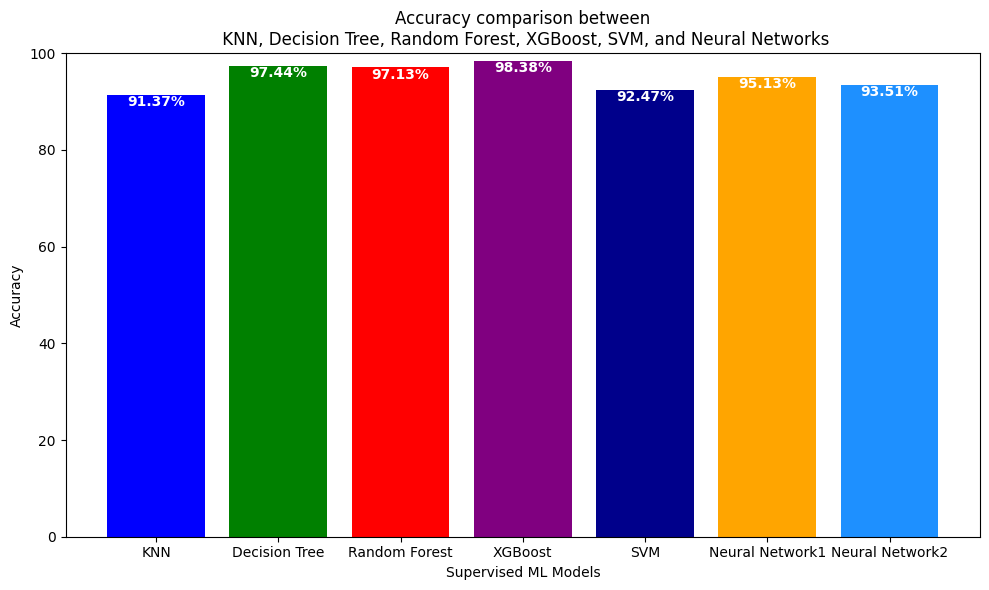

In [135]:
# Comparison of all accuracies with a bar chart
x_labels = ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'Neural Network1','Neural Network2']
y_values = [accuracy_knn, accuracy_tree, accuracy_ran_forest, accuracy_xg, accuracy_svm, accuracy, accuracy2]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color=['blue', 'green', 'red', 'purple', 'darkblue', 'orange','dodgerblue'])
# show value on top of each bar
for index, value in enumerate(y_values):
    plt.text(index, value-3, str(value)+'%', ha='center', va='bottom',weight='bold',color='white')

plt.ylim(0, 100)
plt.xlabel('Supervised ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison between\n KNN, Decision Tree, Random Forest, XGBoost, SVM, and Neural Networks')

plt.tight_layout()
plt.show()

##XGBoost has the highest accuracy compared to the other models, i.e. 98.38%. We will use XGBoost for the deployment.